In [10]:
# https://arxiv.org/pdf/1409.1556
# https://deanhan.com/2018/07/26/vgg16/

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# 若下載失敗，請先刪除 c:\<使用者>\.keras\models\vgg16_weights_tf_dim_ordering_tf_kernels.h5
# command shift . to get .folders in finder
model = tf.keras.applications.VGG16(weights='imagenet', include_top=True)
model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 1000)           │     4,097,000 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# https://github.com/handsomeboy/vgg16 
img_path = 'frog.jpg'
#img_path = 'tiger.jpg' 并转化为224*224的标准尺寸
# img_path = 'bagel.jpg'

img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))

x = tf.keras.preprocessing.image.img_to_array(img) #转化为浮点型
x = np.expand_dims(x, axis=0)#转化为张量size为(1, 224, 224, 3)
x = tf.keras.applications.vgg16.preprocess_input(x)

# 預測，取得features，維度為 (1,1000)
features = model.predict(x)

# 取得前五個最可能的類別及機率
pred = tf.keras.applications.vgg16.decode_predictions(features, top=5)[0]
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


[('n01644373', 'tree_frog', 0.98474807),
 ('n01644900', 'tailed_frog', 0.010982327),
 ('n02259212', 'leafhopper', 0.0016560969),
 ('n02226429', 'grasshopper', 0.0010789087),
 ('n01693334', 'green_lizard', 0.00035001626)]

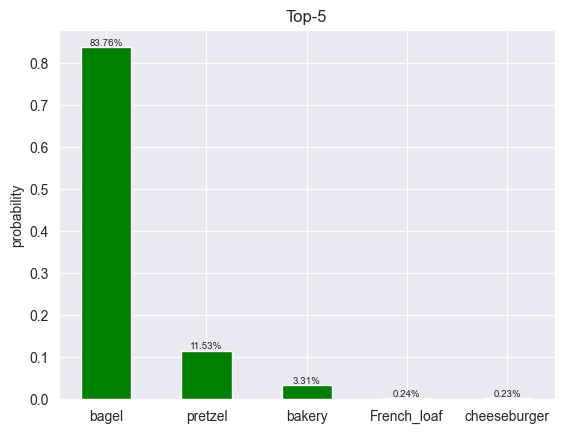

In [9]:
#整理预测结果,value
values = []
bar_label = []
for element in pred:
    values.append(element[2])
    bar_label.append(element[1])

#绘图并保存
def percent(value):
    return '%.2f%%' % (value * 100)

fig=plt.figure(u"Top-5 预测结果")
ax = fig.add_subplot(111)
ax.bar(range(len(values)), values, tick_label=bar_label, width=0.5, fc='g')
ax.set_ylabel(u'probability')
ax.set_title(u'Top-5')
for a,b in zip(range(len(values)), values):
    ax.text(a, b+0.0005, percent(b), ha='center', va = 'bottom', fontsize=7)

fig = plt.gcf()
plt.show()

name=img_path[0:-4]+'_pred'
fig.savefig(name, dpi=200)